# Bike Sharing Demand Prediction

## Problem Statement

BoomBikes, a bike-sharing service provider in the United States, has experienced a decline in revenue due to the Covid-19 pandemic. To revitalize their business post-lockdown, BoomBikes aims to comprehend the factors influencing the demand for shared bikes in the American market. The company seeks insights into:

1. **Significant Variables:** Identify the variables that play a crucial role in predicting the demand for shared bikes.

2. **Demand Dynamics:** Understand how well these variables describe the variations in bike demands.

## Objective

The primary objective is to build a predictive model for the demand of shared bikes based on independent variables. This model will assist BoomBikes in:

- Formulating a mindful business plan to meet customer demands post-lockdown.
- Adapting their business strategy to optimize revenue based on demand dynamics.
- Gaining insights into the demand dynamics of the American market.

**Dataset:**

It contains the complete data of shared bikes through the time period 2018 to 2019.

# Data understanding, preparation and EDA

## Step 1: Import Libraries and Load Data

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# Load the dataset
bike = pd.read_csv('day.csv')
bike.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [3]:
# Data Overview:
# Check basic statistics and information about the dataset.
bike.shape

(730, 16)

In [4]:
#droping instant,casual and registered

bike = bike.drop(['instant','casual','registered'], axis=1)

In [5]:
# Display basic statistics
print(bike.describe())

           season          yr        mnth     holiday     weekday  workingday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     2.498630    0.500000    6.526027    0.028767    2.997260    0.683562   
std      1.110184    0.500343    3.450215    0.167266    2.006161    0.465405   
min      1.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
25%      2.000000    0.000000    4.000000    0.000000    1.000000    0.000000   
50%      3.000000    0.500000    7.000000    0.000000    3.000000    1.000000   
75%      3.000000    1.000000   10.000000    0.000000    5.000000    1.000000   
max      4.000000    1.000000   12.000000    1.000000    6.000000    1.000000   

       weathersit        temp       atemp         hum   windspeed          cnt  
count  730.000000  730.000000  730.000000  730.000000  730.000000   730.000000  
mean     1.394521   20.319259   23.726322   62.765175   12.763620  4508.006849  
std      0.544807    7.5067

In [6]:
# Display information about the dataset
print(bike.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  cnt         730 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 74.3+ KB
None


In [8]:
# Check for Missing Values:
# Identify and handle missing values if necessary.

print(bike.isnull().sum())

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64


Now that we have a clean dataset with no missing values, we can proceed with our analysis

In [24]:
# Handle Categorical Variables
# Convert 'season', 'yr', 'mnth', 'holiday', 'weekday', 'weathersit' to categorical
categorical_vars = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'weathersit']
for var in categorical_vars:
    bike[var] = pd.Categorical(bike[var])

## Univariate analysis

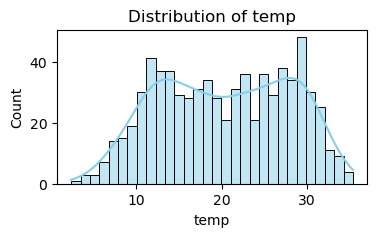

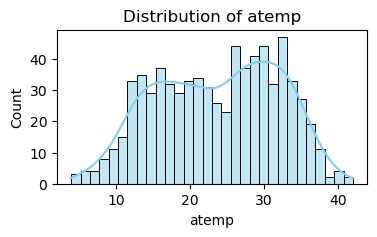

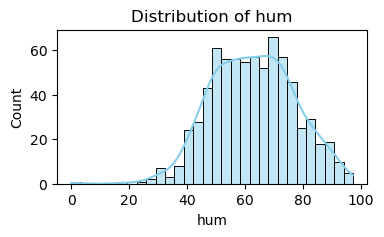

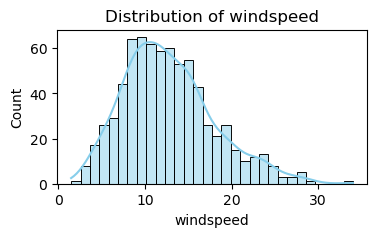

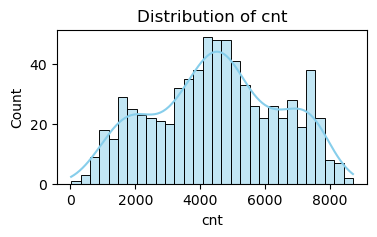

In [26]:
# Univariate analysis for numerical variables
numerical_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
for var in numerical_vars:
    plt.figure(figsize=(4, 2))
    sns.histplot(bike[var], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {var}')
    plt.show()

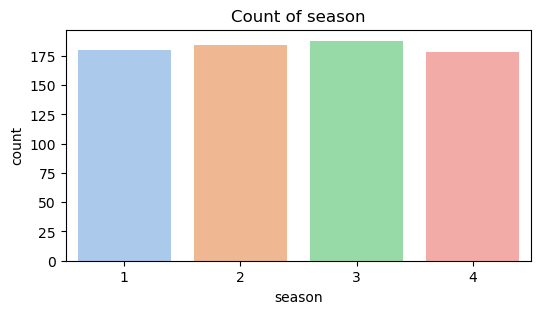

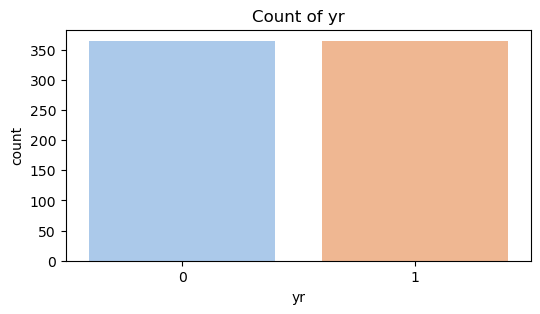

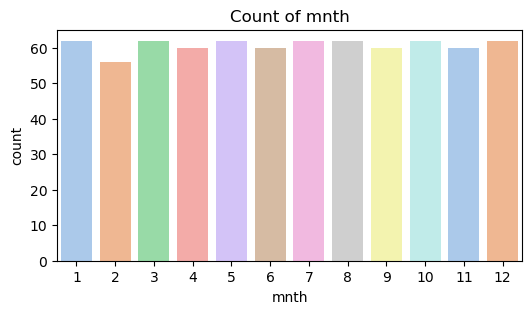

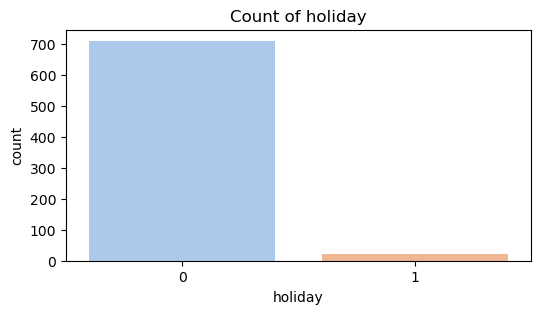

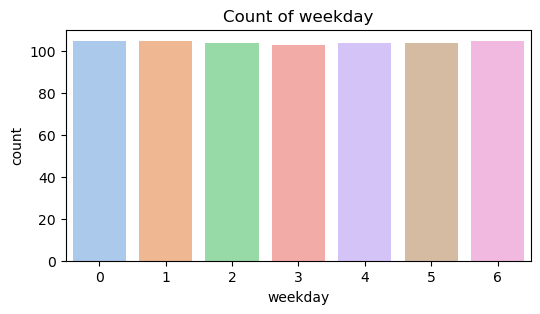

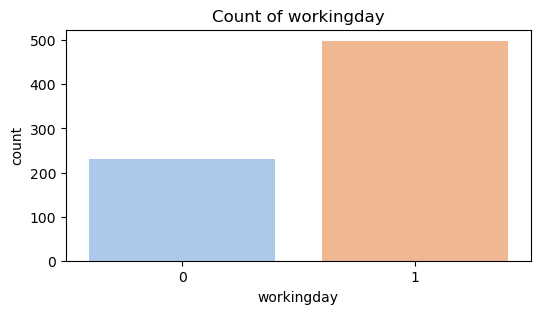

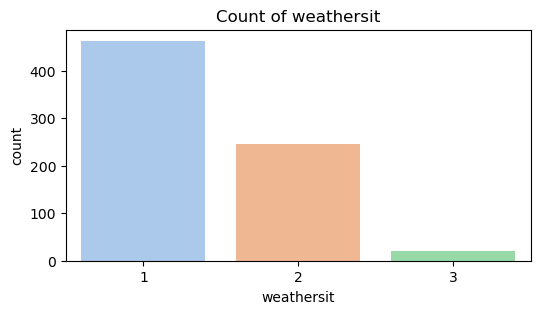

In [27]:
# Univariate analysis for categorical variables
categorical_vars = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
for var in categorical_vars:
    plt.figure(figsize=(6, 3))
    sns.countplot(x=var, data=bike, palette='pastel')
    plt.title(f'Count of {var}')
    plt.show()

## Bivariate analysis

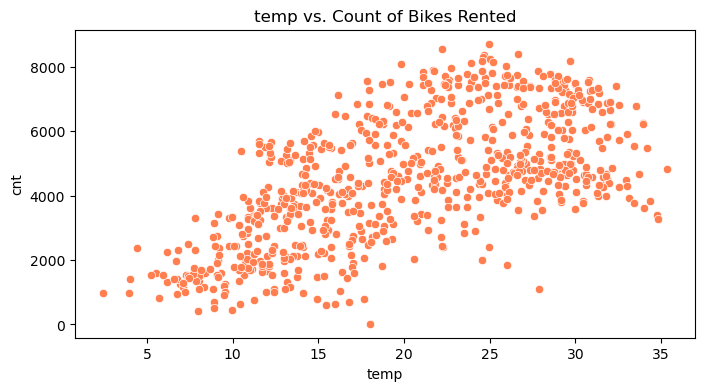

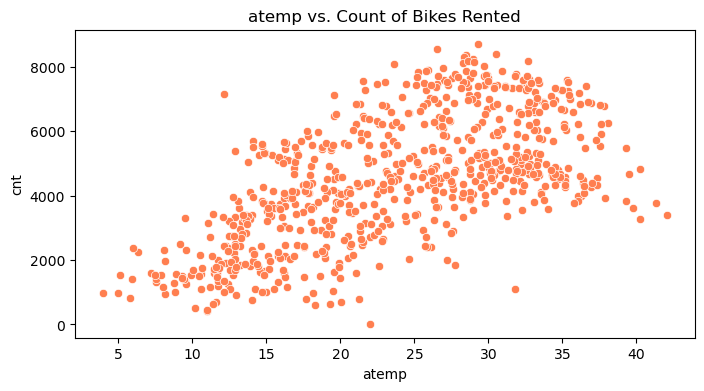

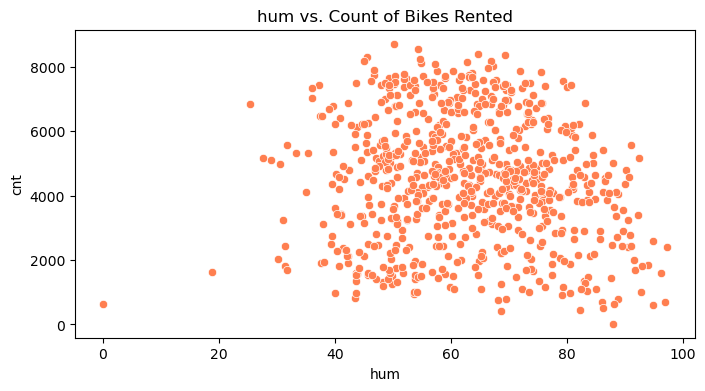

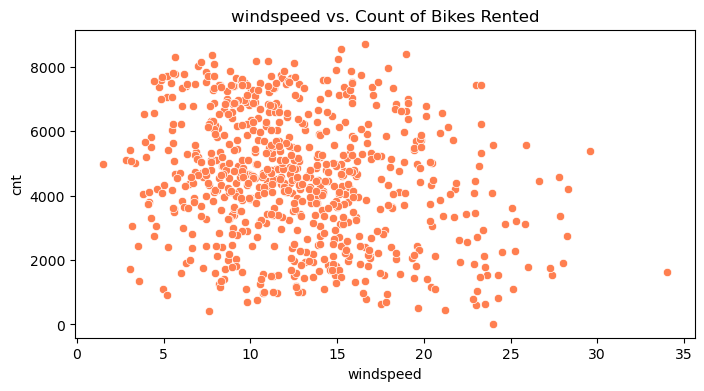

In [28]:
# Bivariate analysis for numerical variables with 'cnt'
for var in numerical_vars[:-1]:  # Exclude 'cnt'
    plt.figure(figsize=(8, 4))
    sns.scatterplot(x=var, y='cnt', data=bike, color='coral')
    plt.title(f'{var} vs. Count of Bikes Rented')
    plt.show()



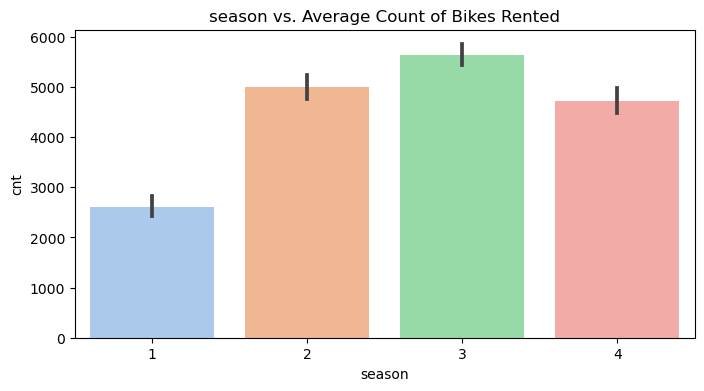

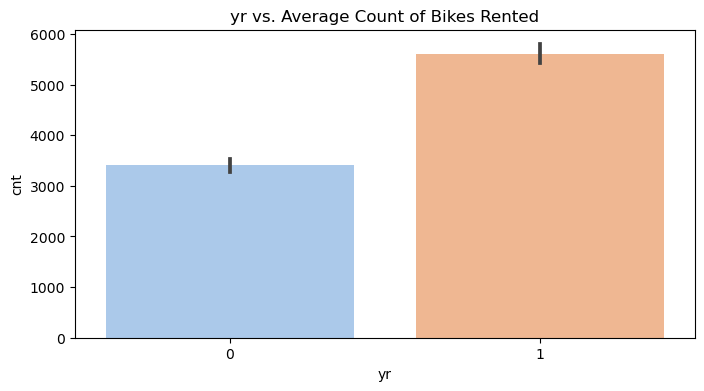

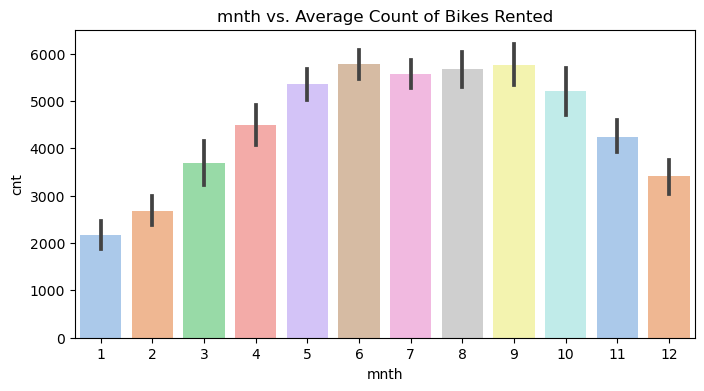

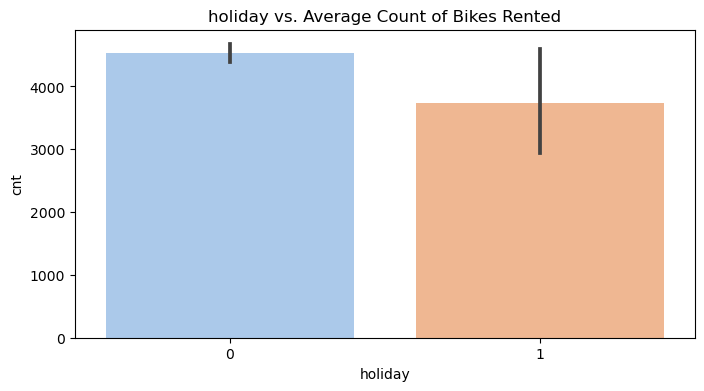

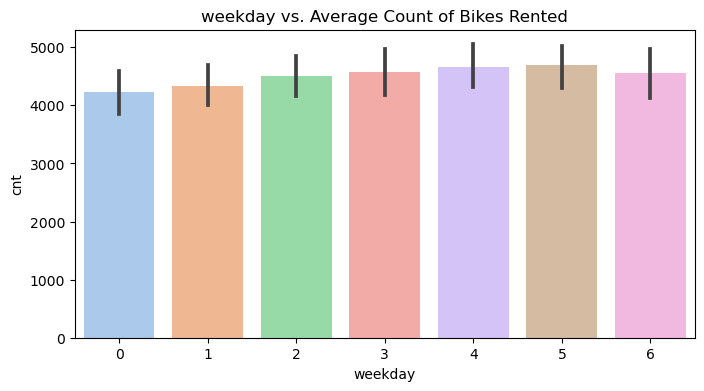

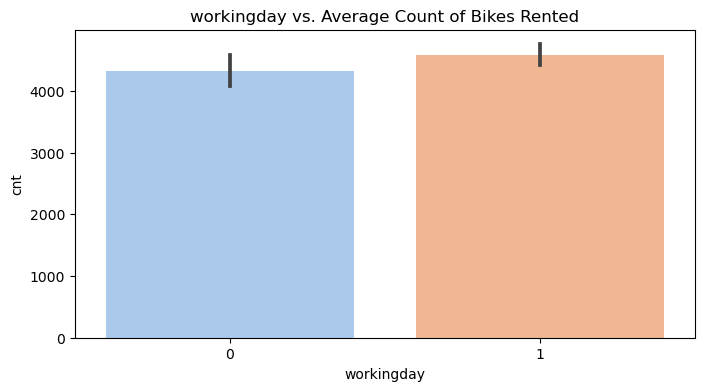

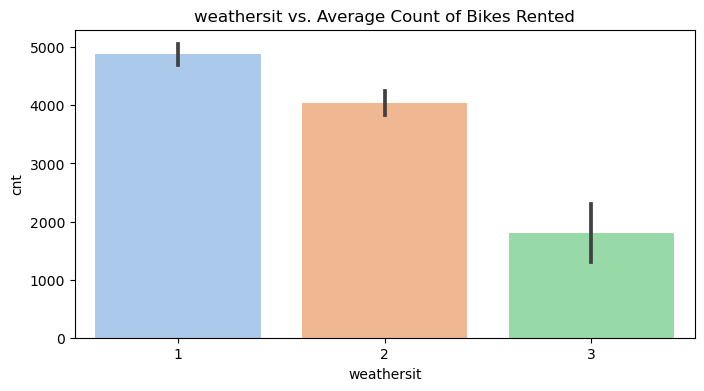

In [29]:
# Bivariate analysis for categorical variables with 'cnt'
for var in categorical_vars:
    plt.figure(figsize=(8, 4))
    sns.barplot(x=var, y='cnt', data=bike, palette='pastel')
    plt.title(f'{var} vs. Average Count of Bikes Rented')
    plt.show()


## Multivariate analysis

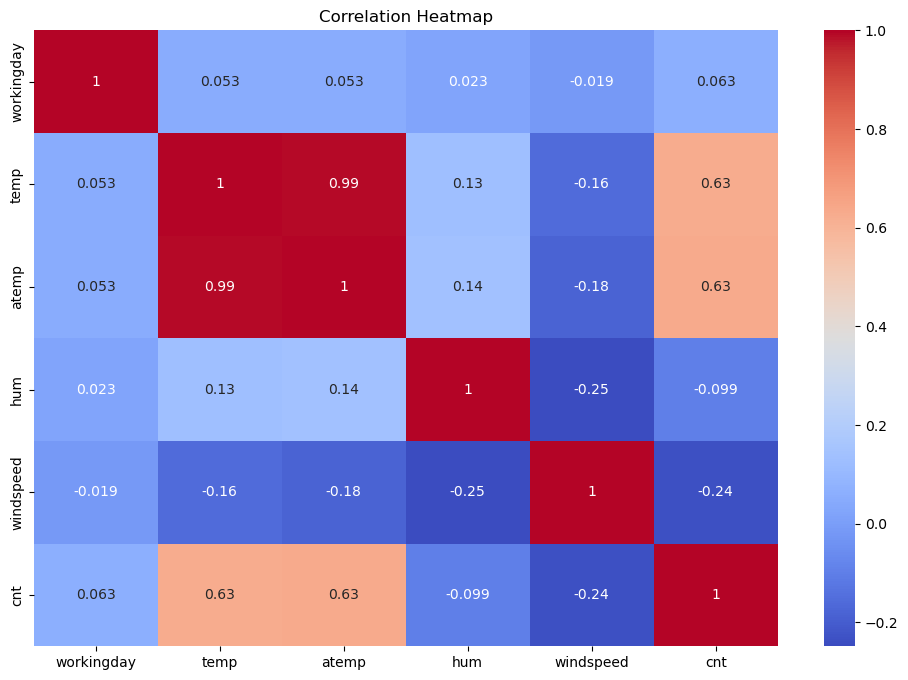

In [30]:
# Multivariate analysis using heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(bike.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

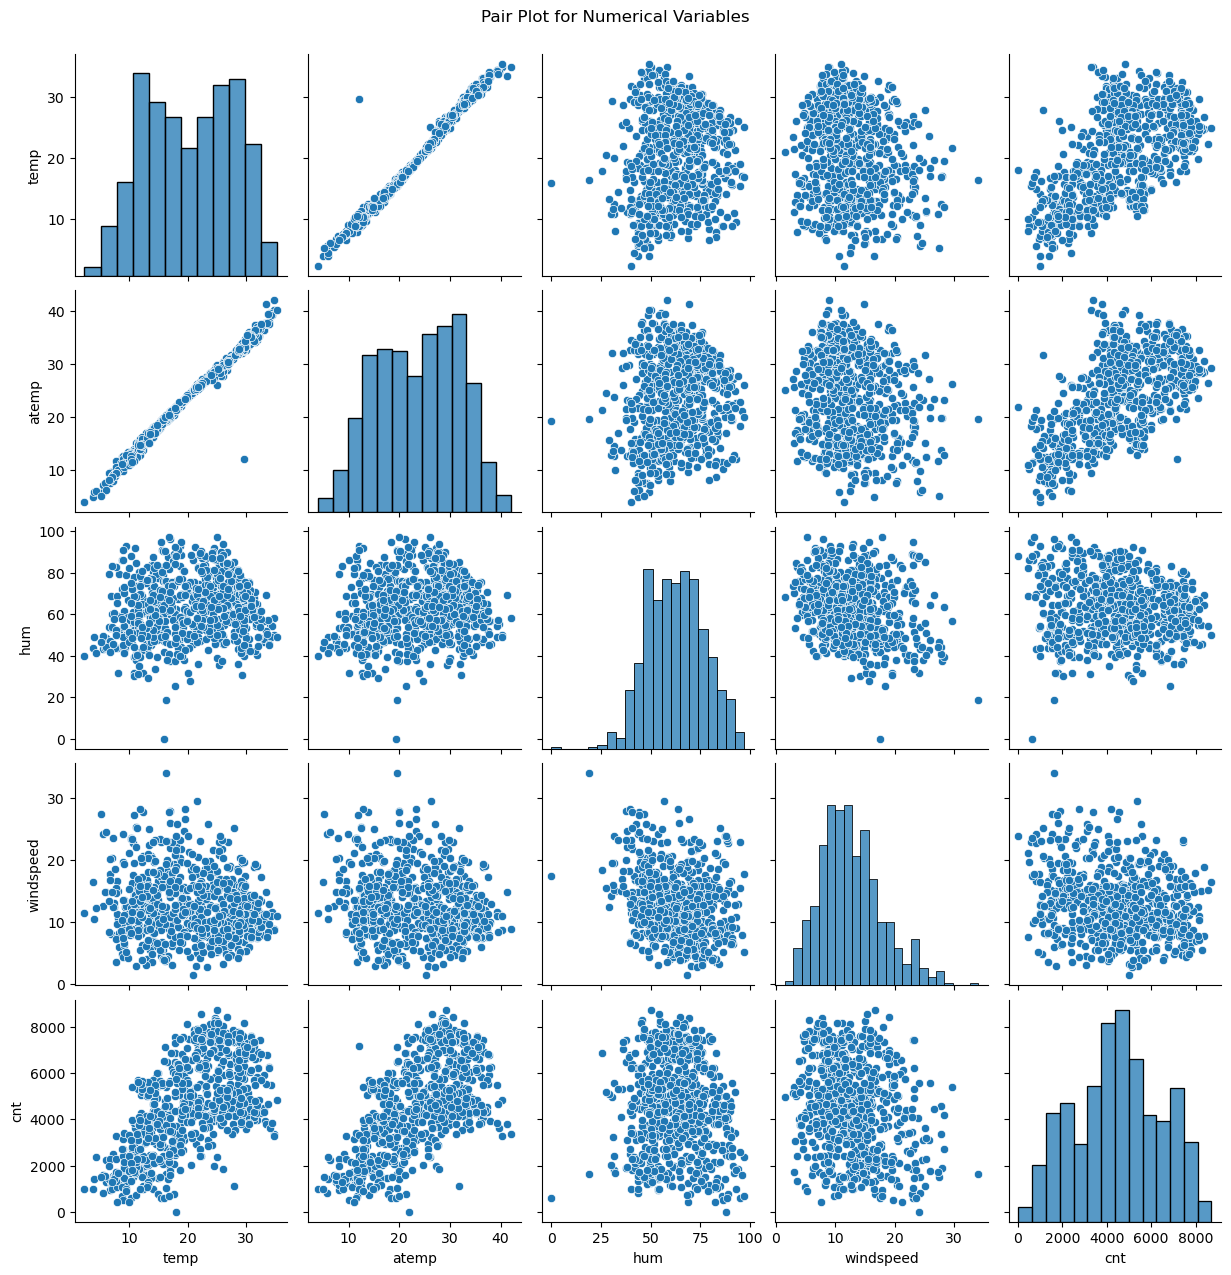

In [34]:
# Multivariate analysis using pair plot
sns.pairplot(bike[['temp', 'atemp', 'hum', 'windspeed', 'cnt']])
plt.suptitle('Pair Plot for Numerical Variables', y=1.02)
plt.show()

## Step:2 Preparing the data for modeling
Encoding:

-Converting binary cartegorical variable to 1/0

-Other cartegorical variable into dummy variable

In [32]:
# mapping the data for better understanding

bike['season'] = bike['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
bike['mnth'] = bike['mnth'].map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})
bike['weekday'] = bike['weekday'].map({0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'})
bike['weathersit'] = bike['weathersit'].map({1: 'Clear', 2: 'Mist + Cloudy', 3: 'Light Snow/Rain', 4: 'Heavy Rain/Snow'})

# Display the updated DataFrame
print(bike.head())

       dteday  season yr mnth holiday weekday  workingday     weathersit  \
0  01-01-2018  spring  0  Jan       0     Sat           0  Mist + Cloudy   
1  02-01-2018  spring  0  Jan       0     Sun           0  Mist + Cloudy   
2  03-01-2018  spring  0  Jan       0     Mon           1          Clear   
3  04-01-2018  spring  0  Jan       0     Tue           1          Clear   
4  05-01-2018  spring  0  Jan       0     Wed           1          Clear   

        temp     atemp      hum  windspeed   cnt  
0  14.110847  18.18125  80.5833  10.749882   985  
1  14.902598  17.68695  69.6087  16.652113   801  
2   8.050924   9.47025  43.7273  16.636703  1349  
3   8.200000  10.60610  59.0435  10.739832  1562  
4   9.305237  11.46350  43.6957  12.522300  1600  


In [33]:
# creating the dummy variable for all the categorical variable where no.r of categories >2
bike = pd.get_dummies(bike, columns=['season', 'mnth', 'weekday', 'weathersit'], drop_first=True)
bike.head()

dteday yr holiday  workingday       temp     atemp      hum  windspeed  \
0  01-01-2018  0       0           0  14.110847  18.18125  80.5833  10.749882   
1  02-01-2018  0       0           0  14.902598  17.68695  69.6087  16.652113   
2  03-01-2018  0       0           1   8.050924   9.47025  43.7273  16.636703   
3  04-01-2018  0       0           1   8.200000  10.60610  59.0435  10.739832   
4  05-01-2018  0       0           1   9.305237  11.46350  43.6957  12.522300   

    cnt  season_summer  ...  mnth_Nov  mnth_Dec  weekday_Mon  weekday_Tue  \
0   985              0  ...         0         0            0            0   
1   801              0  ...         0         0            0            0   
2  1349              0  ...         0         0            1            0   
3  1562              0  ...         0         0            0            1   
4  1600              0  ...         0         0            0            0   

   weekday_Wed  weekday_Thu  weekday_Fri  weekday_Sat  \
0            0            0            0            1   
1            0            0            0            0   
2            0            0            0            0   
3            0            0            0            0   
4            1            0            0            0   

   weathersit_Mist + Cloudy  weathersit_Light Snow/Rain  
0                         1                           0  
1                         1                           0  
2                         0                           0  
3                         0                           0  
4                         0                           0  

[5 rows x 31 columns]

## Splitting into train and test

In [106]:

df_train,df_test = train_test_split(bike, train_size=0.7,random_state=100)

print("Training set - X:",df_train.shape)
print("Training set - X:",df_test.shape)

Training set - X: (510, 31)
Training set - X: (220, 31)


In [107]:
df_train = df_train.drop(['dteday'],axis =1)
df_test = df_test.drop(['dteday'],axis =1)

In [47]:
#Common methods for rescaling include Min-Max Scaling (adjusting values to a specific range) 
#and Standardization (transforming values to have a mean of 0 and a standard deviation of 1)

#1. Instantiate an object
scaler = MinMaxScaler()

# create a list of numeric variable
num_vars = ['temp','atemp','hum','windspeed','cnt']

#2. Fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [48]:
df_train.describe()

workingday        temp       atemp         hum   windspeed         cnt  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.676471    0.537440    0.513156    0.650480    0.320883    0.513499   
std      0.468282    0.225858    0.212410    0.145846    0.169803    0.224421   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.339853    0.332086    0.538643    0.199179    0.356420   
50%      1.000000    0.542596    0.529718    0.653714    0.296763    0.518638   
75%      1.000000    0.735215    0.688457    0.754830    0.414447    0.684710   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

       season_summer  season_fall  season_winter    mnth_Feb  ...    mnth_Nov  \
count     510.000000   510.000000     510.000000  510.000000  ...  510.000000   
mean        0.247059     0.262745       0.247059    0.066667  ...    0.086275   
std         0.431725     0.440557       0.431725    0.249689  ...    0.281045   
min         0.000000     0.000000       0.000000    0.000000  ...    0.000000   
25%         0.000000     0.000000       0.000000    0.000000  ...    0.000000   
50%         0.000000     0.000000       0.000000    0.000000  ...    0.000000   
75%         0.000000     1.000000       0.000000    0.000000  ...    0.000000   
max         1.000000     1.000000       1.000000    1.000000  ...    1.000000   

         mnth_Dec  weekday_Mon  weekday_Tue  weekday_Wed  weekday_Thu  \
count  510.000000   510.000000   510.000000   510.000000   510.000000   
mean     0.084314     0.150980     0.131373     0.158824     0.133333   
std      0.278131     0.358381     0.338139     0.365870     0.340268   
min      0.000000     0.000000     0.000000     0.000000     0.000000   
25%      0.000000     0.000000     0.000000     0.000000     0.000000   
50%      0.000000     0.000000     0.000000     0.000000     0.000000   
75%      0.000000     0.000000     0.000000     0.000000     0.000000   
max      1.000000     1.000000     1.000000     1.000000     1.000000   

       weekday_Fri  weekday_Sat  weathersit_Mist + Cloudy  \
count   510.000000   510.000000                510.000000   
mean      0.127451     0.154902                  0.345098   
std       0.333805     0.362166                  0.475867   
min       0.000000     0.000000                  0.000000   
25%       0.000000     0.000000                  0.000000   
50%       0.000000     0.000000                  0.000000   
75%       0.000000     0.000000                  1.000000   
max       1.000000     1.000000                  1.000000   

       weathersit_Light Snow/Rain  
count                  510.000000  
mean                     0.029412  
std                      0.169124  
min                      0.000000  
25%                      0.000000  
50%                      0.000000  
75%                      0.000000  
max                      1.000000  

[8 rows x 28 columns]

## Training the model

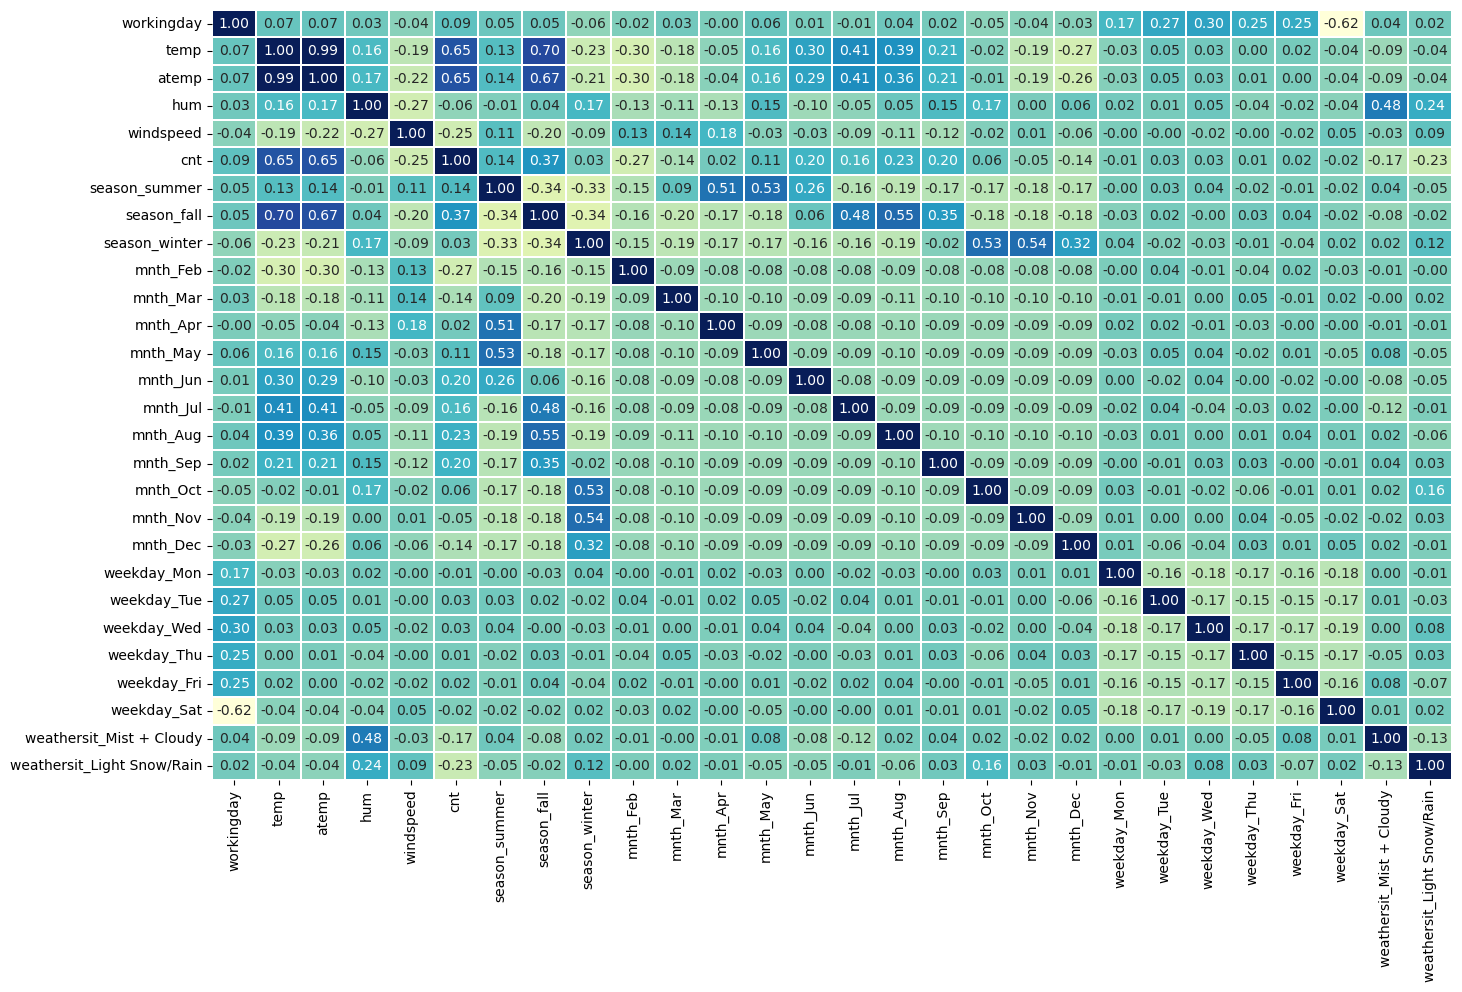

In [49]:
#Heatmap
plt.figure(figsize=(16,10))
#sns.heatmap(df_train.corr(), annot = True,fmt=".2f",linewidths=.4, cmap ="YlGnBu")
sns.heatmap(df_train.corr(), annot=True, cmap="YlGnBu", linewidths=.3, cbar=False,fmt=".2f")
plt.show()

## Building the Model

### Adding all the variable to the model

In [50]:
#X_train,y_train
y_train = df_train.pop('cnt')
X_train = df_train

In [52]:
#build a model with all variables
X_train_sm = sm.add_constant(X_train)

#create first model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.37
Date:                Mon, 15 Jan 2024   Prob (F-statistic):          2.81e-180
Time:                        13:51:24   Log-Likelihood:                 527.12
No. Observations:                 510   AIC:                            -996.2
Df Residuals:                     481   BIC:                            -873.4
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

A small p-value (usually less than 0.05) suggests that the null hypothesis (no effect) can be rejected, indicating a significant relationship between the predictor variable and the response variable.
A large p-value suggests that there is no significant evidence to reject the null hypothesis.

## VIF
VIF assesses the extent to which the variance of an estimated regression coefficient increases if your predictors are correlated. It helps identify multicollinearity, where one predictor variable can be predicted from others in the model.


In [53]:
vif = pd.DataFrame()
vif['Feauture'] = X_train.columns

vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

Feauture     VIF
24                 weekday_Thu     inf
2                   workingday     inf
23                 weekday_Wed     inf
22                 weekday_Tue     inf
21                 weekday_Mon     inf
25                 weekday_Fri     inf
1                      holiday     inf
3                         temp  446.42
4                        atemp  383.20
5                          hum   20.80
8                  season_fall   15.37
16                    mnth_Aug   10.92
9                season_winter   10.83
15                    mnth_Jul    9.54
7                season_summer    8.94
14                    mnth_Jun    7.43
17                    mnth_Sep    7.29
13                    mnth_May    7.15
18                    mnth_Oct    6.50
19                    mnth_Nov    5.98
12                    mnth_Apr    5.64
6                    windspeed    4.71
20                    mnth_Dec    3.78
11                    mnth_Mar    3.05
27    weathersit_Mist + Cloudy    2.21
0                           yr    2.09
26                 weekday_Sat    1.93
10                    mnth_Feb    1.71
28  weathersit_Light Snow/Rain    1.23

In [54]:
#we will remove the categories which have high p-value and vif

X = X_train.drop('weekday_Thu', axis = 1)

In [55]:
#build another model
X_train_sm = sm.add_constant(X)

#create first model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.37
Date:                Mon, 15 Jan 2024   Prob (F-statistic):          2.81e-180
Time:                        13:58:39   Log-Likelihood:                 527.12
No. Observations:                 510   AIC:                            -996.2
Df Residuals:                     481   BIC:                            -873.4
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [58]:
vif = pd.DataFrame()
vif['Feauture'] = X.columns

vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

Feauture     VIF
3                         temp  446.42
4                        atemp  383.20
5                          hum   20.80
8                  season_fall   15.37
16                    mnth_Aug   10.92
9                season_winter   10.83
15                    mnth_Jul    9.54
2                   workingday    9.31
7                season_summer    8.94
14                    mnth_Jun    7.43
17                    mnth_Sep    7.29
13                    mnth_May    7.15
18                    mnth_Oct    6.50
19                    mnth_Nov    5.98
12                    mnth_Apr    5.64
6                    windspeed    4.71
20                    mnth_Dec    3.78
11                    mnth_Mar    3.05
21                 weekday_Mon    2.25
23                 weekday_Wed    2.22
26    weathersit_Mist + Cloudy    2.21
0                           yr    2.09
22                 weekday_Tue    2.03
24                 weekday_Fri    2.02
25                 weekday_Sat    1.93
10                    mnth_Feb    1.71
1                      holiday    1.46
27  weathersit_Light Snow/Rain    1.23

### We will keep removing the variable untill we have p-value < 0.05 and VIF < 5

In [59]:
#we will remove the categories which have high p-value and vif

X = X.drop('atemp', axis = 1)

In [60]:
#build another model
X_train_sm = sm.add_constant(X)

#create first model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
print(lr_model.summary())


#VIF
vif = pd.DataFrame()
vif['Feauture'] = X.columns

vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.2
Date:                Mon, 15 Jan 2024   Prob (F-statistic):          3.00e-181
Time:                        14:02:53   Log-Likelihood:                 527.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     482   BIC:                            -879.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

Feauture    VIF
3                         temp  46.87
4                          hum  20.66
7                  season_fall  15.35
15                    mnth_Aug  10.83
8                season_winter  10.83
14                    mnth_Jul   9.52
2                   workingday   9.30
6                season_summer   8.94
13                    mnth_Jun   7.40
16                    mnth_Sep   7.28
12                    mnth_May   7.14
17                    mnth_Oct   6.50
18                    mnth_Nov   5.97
11                    mnth_Apr   5.63
5                    windspeed   4.47
19                    mnth_Dec   3.77
10                    mnth_Mar   3.05
20                 weekday_Mon   2.25
22                 weekday_Wed   2.22
25    weathersit_Mist + Cloudy   2.21
0                           yr   2.09
21                 weekday_Tue   2.03
23                 weekday_Fri   2.00
24                 weekday_Sat   1.93
9                     mnth_Feb   1.71
1                      holiday   1.46
26  weathersit_Light Snow/Rain   1.22

In [61]:
#we will remove the categories which have high p-value and vif

X = X.drop('weekday_Wed', axis = 1)

In [62]:
#build another model
X_train_sm = sm.add_constant(X)

#create first model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
print(lr_model.summary())


#VIF
vif = pd.DataFrame()
vif['Feauture'] = X.columns

vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     107.4
Date:                Mon, 15 Jan 2024   Prob (F-statistic):          2.95e-182
Time:                        14:03:54   Log-Likelihood:                 526.99
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     483   BIC:                            -885.7
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

Feauture    VIF
3                         temp  46.86
4                          hum  20.65
7                  season_fall  15.33
8                season_winter  10.83
15                    mnth_Aug  10.82
14                    mnth_Jul   9.51
6                season_summer   8.94
13                    mnth_Jun   7.39
16                    mnth_Sep   7.28
12                    mnth_May   7.14
2                   workingday   6.53
17                    mnth_Oct   6.50
18                    mnth_Nov   5.97
11                    mnth_Apr   5.63
5                    windspeed   4.47
19                    mnth_Dec   3.77
10                    mnth_Mar   3.05
24    weathersit_Mist + Cloudy   2.21
0                           yr   2.09
23                 weekday_Sat   1.93
9                     mnth_Feb   1.71
20                 weekday_Mon   1.64
21                 weekday_Tue   1.48
22                 weekday_Fri   1.47
1                      holiday   1.38
25  weathersit_Light Snow/Rain   1.22

In [64]:
#we will remove the categories which have high p-value and vif

X = X.drop('weekday_Fri', axis = 1)

In [65]:
#build another model
X_train_sm = sm.add_constant(X)

#create first model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
print(lr_model.summary())


#VIF
vif = pd.DataFrame()
vif['Feauture'] = X.columns

vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     111.8
Date:                Mon, 15 Jan 2024   Prob (F-statistic):          3.19e-183
Time:                        14:04:50   Log-Likelihood:                 526.84
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     484   BIC:                            -891.6
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

Feauture    VIF
3                         temp  46.85
4                          hum  20.64
7                  season_fall  15.33
8                season_winter  10.83
15                    mnth_Aug  10.81
14                    mnth_Jul   9.50
6                season_summer   8.94
13                    mnth_Jun   7.39
16                    mnth_Sep   7.28
12                    mnth_May   7.14
17                    mnth_Oct   6.49
18                    mnth_Nov   5.97
2                   workingday   5.75
11                    mnth_Apr   5.63
5                    windspeed   4.47
19                    mnth_Dec   3.77
10                    mnth_Mar   3.05
23    weathersit_Mist + Cloudy   2.20
0                           yr   2.09
22                 weekday_Sat   1.93
9                     mnth_Feb   1.71
20                 weekday_Mon   1.47
1                      holiday   1.35
21                 weekday_Tue   1.33
24  weathersit_Light Snow/Rain   1.21

In [66]:
#we will remove the categories which have high p-value and vif

X = X.drop('mnth_Nov', axis = 1)

In [67]:
#build another model
X_train_sm = sm.add_constant(X)

#create first model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
print(lr_model.summary())


#VIF
vif = pd.DataFrame()
vif['Feauture'] = X.columns

vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     116.6
Date:                Mon, 15 Jan 2024   Prob (F-statistic):          3.72e-184
Time:                        14:05:43   Log-Likelihood:                 526.58
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     485   BIC:                            -897.3
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

Feauture    VIF
3                         temp  44.77
4                          hum  20.45
7                  season_fall  13.18
6                season_summer   8.49
15                    mnth_Aug   7.94
14                    mnth_Jul   7.10
12                    mnth_May   6.02
13                    mnth_Jun   5.89
2                   workingday   5.75
11                    mnth_Apr   4.77
16                    mnth_Sep   4.61
5                    windspeed   4.34
8                season_winter   4.11
10                    mnth_Mar   2.57
22    weathersit_Mist + Cloudy   2.19
17                    mnth_Oct   2.10
0                           yr   2.08
21                 weekday_Sat   1.93
9                     mnth_Feb   1.57
18                    mnth_Dec   1.55
19                 weekday_Mon   1.47
1                      holiday   1.34
20                 weekday_Tue   1.33
23  weathersit_Light Snow/Rain   1.21

In [68]:
#we will remove the categories which have high p-value and vif

X = X.drop('mnth_Dec', axis = 1)

In [69]:
#build another model
X_train_sm = sm.add_constant(X)

#create first model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
print(lr_model.summary())


#VIF
vif = pd.DataFrame()
vif['Feauture'] = X.columns

vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     121.9
Date:                Mon, 15 Jan 2024   Prob (F-statistic):          3.46e-185
Time:                        14:06:29   Log-Likelihood:                 526.54
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     486   BIC:                            -903.5
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

Feauture    VIF
3                         temp  44.76
4                          hum  19.73
7                  season_fall  13.13
6                season_summer   8.49
15                    mnth_Aug   7.71
14                    mnth_Jul   6.93
12                    mnth_May   5.89
13                    mnth_Jun   5.76
2                   workingday   5.74
11                    mnth_Apr   4.68
16                    mnth_Sep   4.40
5                    windspeed   4.34
8                season_winter   3.97
10                    mnth_Mar   2.47
21    weathersit_Mist + Cloudy   2.18
0                           yr   2.08
20                 weekday_Sat   1.92
17                    mnth_Oct   1.83
9                     mnth_Feb   1.52
18                 weekday_Mon   1.47
1                      holiday   1.34
19                 weekday_Tue   1.33
22  weathersit_Light Snow/Rain   1.20

In [70]:
#we will remove the categories which have high p-value and vif

X = X.drop('mnth_Jul', axis = 1)

In [71]:
#build another model
X_train_sm = sm.add_constant(X)

#create first model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
print(lr_model.summary())


#VIF
vif = pd.DataFrame()
vif['Feauture'] = X.columns

vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     127.7
Date:                Mon, 15 Jan 2024   Prob (F-statistic):          3.23e-186
Time:                        14:07:20   Log-Likelihood:                 526.48
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     487   BIC:                            -909.6
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

Feauture    VIF
3                         temp  29.57
4                          hum  18.61
7                  season_fall   9.77
6                season_summer   7.62
2                   workingday   5.71
5                    windspeed   4.32
12                    mnth_May   3.84
8                season_winter   3.82
11                    mnth_Apr   3.40
13                    mnth_Jun   2.55
20    weathersit_Mist + Cloudy   2.17
0                           yr   2.08
14                    mnth_Aug   2.02
10                    mnth_Mar   1.96
19                 weekday_Sat   1.92
16                    mnth_Oct   1.67
15                    mnth_Sep   1.58
9                     mnth_Feb   1.48
17                 weekday_Mon   1.46
18                 weekday_Tue   1.33
1                      holiday   1.31
21  weathersit_Light Snow/Rain   1.20

In [72]:
#we will remove the categories which have high p-value and vif

X = X.drop('weekday_Tue', axis = 1)

In [73]:
#build another model
X_train_sm = sm.add_constant(X)

#create first model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
print(lr_model.summary())


#VIF
vif = pd.DataFrame()
vif['Feauture'] = X.columns

vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     133.7
Date:                Mon, 15 Jan 2024   Prob (F-statistic):          4.75e-187
Time:                        14:08:12   Log-Likelihood:                 525.90
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     488   BIC:                            -914.6
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

Feauture    VIF
3                         temp  29.56
4                          hum  18.61
7                  season_fall   9.77
6                season_summer   7.61
2                   workingday   5.35
5                    windspeed   4.32
12                    mnth_May   3.84
8                season_winter   3.82
11                    mnth_Apr   3.40
13                    mnth_Jun   2.55
19    weathersit_Mist + Cloudy   2.17
0                           yr   2.08
14                    mnth_Aug   2.02
10                    mnth_Mar   1.96
18                 weekday_Sat   1.92
16                    mnth_Oct   1.67
15                    mnth_Sep   1.58
9                     mnth_Feb   1.48
17                 weekday_Mon   1.38
1                      holiday   1.31
20  weathersit_Light Snow/Rain   1.20

In [74]:
#we will remove the categories which have high p-value and vif

X = X.drop('weekday_Mon', axis = 1)

In [75]:
#build another model
X_train_sm = sm.add_constant(X)

#create first model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
print(lr_model.summary())


#VIF
vif = pd.DataFrame()
vif['Feauture'] = X.columns

vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     140.2
Date:                Mon, 15 Jan 2024   Prob (F-statistic):          7.28e-188
Time:                        14:09:02   Log-Likelihood:                 525.26
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     489   BIC:                            -919.6
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

Feauture    VIF
3                         temp  29.46
4                          hum  18.58
7                  season_fall   9.76
6                season_summer   7.61
2                   workingday   5.13
5                    windspeed   4.32
12                    mnth_May   3.84
8                season_winter   3.82
11                    mnth_Apr   3.40
13                    mnth_Jun   2.55
18    weathersit_Mist + Cloudy   2.17
0                           yr   2.07
14                    mnth_Aug   2.02
10                    mnth_Mar   1.96
17                 weekday_Sat   1.92
16                    mnth_Oct   1.66
15                    mnth_Sep   1.58
9                     mnth_Feb   1.48
19  weathersit_Light Snow/Rain   1.20
1                      holiday   1.17

In [76]:
#we will remove the categories which have high p-value and vif

X = X.drop('mnth_Feb', axis = 1)

In [77]:
#build another model
X_train_sm = sm.add_constant(X)

#create first model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
print(lr_model.summary())


#VIF
vif = pd.DataFrame()
vif['Feauture'] = X.columns

vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     147.3
Date:                Mon, 15 Jan 2024   Prob (F-statistic):          1.29e-188
Time:                        14:09:45   Log-Likelihood:                 524.44
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     490   BIC:                            -924.2
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

Feauture    VIF
3                         temp  29.25
4                          hum  17.98
7                  season_fall   9.03
6                season_summer   7.47
2                   workingday   5.10
5                    windspeed   4.13
11                    mnth_May   3.74
10                    mnth_Apr   3.33
8                season_winter   3.22
12                    mnth_Jun   2.51
17    weathersit_Mist + Cloudy   2.16
0                           yr   2.07
13                    mnth_Aug   2.01
16                 weekday_Sat   1.92
9                     mnth_Mar   1.78
15                    mnth_Oct   1.66
14                    mnth_Sep   1.58
18  weathersit_Light Snow/Rain   1.20
1                      holiday   1.17

In [78]:
#we will remove the categories which have high p-value and vif

X = X.drop('mnth_Apr', axis = 1)

In [79]:
#build another model
X_train_sm = sm.add_constant(X)

#create first model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
print(lr_model.summary())


#VIF
vif = pd.DataFrame()
vif['Feauture'] = X.columns

vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     154.9
Date:                Mon, 15 Jan 2024   Prob (F-statistic):          3.84e-189
Time:                        14:10:31   Log-Likelihood:                 523.05
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     491   BIC:                            -927.7
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

Feauture    VIF
3                         temp  28.98
4                          hum  17.95
7                  season_fall   9.02
2                   workingday   5.10
5                    windspeed   4.05
6                season_summer   3.81
8                season_winter   3.17
16    weathersit_Mist + Cloudy   2.16
0                           yr   2.06
10                    mnth_May   1.99
12                    mnth_Aug   1.96
15                 weekday_Sat   1.92
11                    mnth_Jun   1.68
14                    mnth_Oct   1.66
13                    mnth_Sep   1.55
9                     mnth_Mar   1.39
17  weathersit_Light Snow/Rain   1.20
1                      holiday   1.17

In [80]:
#we will remove the categories which have high p-value and vif

X = X.drop('mnth_Jun', axis = 1)

In [81]:
#build another model
X_train_sm = sm.add_constant(X)

#create first model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
print(lr_model.summary())


#VIF
vif = pd.DataFrame()
vif['Feauture'] = X.columns

vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     163.8
Date:                Mon, 15 Jan 2024   Prob (F-statistic):          5.55e-190
Time:                        14:11:07   Log-Likelihood:                 522.40
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     492   BIC:                            -932.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

Feauture    VIF
3                         temp  24.83
4                          hum  17.58
7                  season_fall   8.80
2                   workingday   5.10
5                    windspeed   4.00
6                season_summer   3.75
8                season_winter   3.12
15    weathersit_Mist + Cloudy   2.15
0                           yr   2.05
14                 weekday_Sat   1.92
11                    mnth_Aug   1.85
10                    mnth_May   1.68
13                    mnth_Oct   1.64
12                    mnth_Sep   1.51
9                     mnth_Mar   1.33
16  weathersit_Light Snow/Rain   1.20
1                      holiday   1.16

In [82]:
#we will remove the categories which have high p-value and vif

X = X.drop('mnth_May', axis = 1)

In [83]:
#build another model
X_train_sm = sm.add_constant(X)

#create first model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
print(lr_model.summary())


#VIF
vif = pd.DataFrame()
vif['Feauture'] = X.columns

vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     173.3
Date:                Mon, 15 Jan 2024   Prob (F-statistic):          1.46e-190
Time:                        14:11:38   Log-Likelihood:                 521.09
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     493   BIC:                            -936.2
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

Feauture    VIF
3                         temp  24.20
4                          hum  17.51
7                  season_fall   8.53
2                   workingday   5.09
5                    windspeed   3.94
6                season_summer   3.54
8                season_winter   3.06
14    weathersit_Mist + Cloudy   2.15
0                           yr   2.04
13                 weekday_Sat   1.92
10                    mnth_Aug   1.85
12                    mnth_Oct   1.64
11                    mnth_Sep   1.51
9                     mnth_Mar   1.28
15  weathersit_Light Snow/Rain   1.20
1                      holiday   1.16

In [84]:
#we will remove the categories which have high p-value and vif

X = X.drop('season_fall', axis = 1)

In [85]:
#build another model
X_train_sm = sm.add_constant(X)

#create first model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
print(lr_model.summary())


#VIF
vif = pd.DataFrame()
vif['Feauture'] = X.columns

vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Mon, 15 Jan 2024   Prob (F-statistic):          4.17e-191
Time:                        14:12:54   Log-Likelihood:                 519.66
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

Feauture    VIF
4                          hum  16.77
3                         temp  10.17
2                   workingday   5.09
5                    windspeed   3.91
7                season_winter   2.33
13    weathersit_Mist + Cloudy   2.14
0                           yr   2.03
12                 weekday_Sat   1.92
6                season_summer   1.84
9                     mnth_Aug   1.61
11                    mnth_Oct   1.61
10                    mnth_Sep   1.34
8                     mnth_Mar   1.23
14  weathersit_Light Snow/Rain   1.18
1                      holiday   1.16

In [86]:
#we will remove the categories which have high p-value and vif

X = X.drop('mnth_Mar', axis = 1)

In [87]:
#build another model
X_train_sm = sm.add_constant(X)

#create first model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
print(lr_model.summary())


#VIF
vif = pd.DataFrame()
vif['Feauture'] = X.columns

vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.6
Date:                Mon, 15 Jan 2024   Prob (F-statistic):          8.70e-192
Time:                        14:13:50   Log-Likelihood:                 518.52
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     495   BIC:                            -943.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

Feauture    VIF
4                          hum  16.57
3                         temp  10.01
2                   workingday   5.05
5                    windspeed   3.83
7                season_winter   2.25
12    weathersit_Mist + Cloudy   2.14
0                           yr   2.03
11                 weekday_Sat   1.90
6                season_summer   1.84
10                    mnth_Oct   1.61
8                     mnth_Aug   1.60
9                     mnth_Sep   1.34
13  weathersit_Light Snow/Rain   1.18
1                      holiday   1.16

In [88]:
#we will remove the categories which have high p-value and vif

X = X.drop('hum', axis = 1)

In [89]:
#build another model
X_train_sm = sm.add_constant(X)

#create first model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
print(lr_model.summary())


#VIF
vif = pd.DataFrame()
vif['Feauture'] = X.columns

vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     201.8
Date:                Mon, 15 Jan 2024   Prob (F-statistic):          1.97e-188
Time:                        14:14:25   Log-Likelihood:                 507.76
No. Observations:                 510   AIC:                            -987.5
Df Residuals:                     496   BIC:                            -928.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

Feauture   VIF
3                         temp  6.39
2                   workingday  4.40
4                    windspeed  3.60
0                           yr  2.02
6                season_winter  2.00
5                season_summer  1.83
10                 weekday_Sat  1.77
9                     mnth_Oct  1.60
7                     mnth_Aug  1.59
11    weathersit_Mist + Cloudy  1.55
8                     mnth_Sep  1.34
1                      holiday  1.12
12  weathersit_Light Snow/Rain  1.10

In [90]:
#we will remove the categories which have high p-value and vif

X = X.drop('mnth_Oct', axis = 1)

In [91]:
#build another model
X_train_sm = sm.add_constant(X)

#create first model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
print(lr_model.summary())


#VIF
vif = pd.DataFrame()
vif['Feauture'] = X.columns

vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.0
Date:                Mon, 15 Jan 2024   Prob (F-statistic):          8.64e-189
Time:                        14:15:08   Log-Likelihood:                 505.81
No. Observations:                 510   AIC:                            -985.6
Df Residuals:                     497   BIC:                            -930.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

Feauture   VIF
3                         temp  6.20
2                   workingday  4.35
4                    windspeed  3.60
0                           yr  2.02
5                season_summer  1.82
9                  weekday_Sat  1.76
7                     mnth_Aug  1.58
10    weathersit_Mist + Cloudy  1.54
6                season_winter  1.52
8                     mnth_Sep  1.31
1                      holiday  1.12
11  weathersit_Light Snow/Rain  1.08

In [92]:
#we will remove the categories which have high p-value and vif

X = X.drop('holiday', axis = 1)

In [93]:
#build another model
X_train_sm = sm.add_constant(X)

#create first model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
print(lr_model.summary())


#VIF
vif = pd.DataFrame()
vif['Feauture'] = X.columns

vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     234.9
Date:                Mon, 15 Jan 2024   Prob (F-statistic):          4.31e-189
Time:                        14:20:10   Log-Likelihood:                 503.70
No. Observations:                 510   AIC:                            -983.4
Df Residuals:                     498   BIC:                            -932.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

Feauture   VIF
2                         temp  6.10
1                   workingday  4.04
3                    windspeed  3.49
0                           yr  2.02
4                season_summer  1.82
8                  weekday_Sat  1.69
6                     mnth_Aug  1.58
9     weathersit_Mist + Cloudy  1.54
5                season_winter  1.51
7                     mnth_Sep  1.30
10  weathersit_Light Snow/Rain  1.08

# Residual Analysis and Predictions

In [94]:
y_train_pred = lr_model.predict(X_train_sm)
y_train_pred

576    0.752788
426    0.488190
728    0.340796
482    0.575040
111    0.276299
         ...   
578    0.841201
53     0.224173
350    0.265367
79     0.314553
520    0.644890
Length: 510, dtype: float64

<Axes: ylabel='Density'>

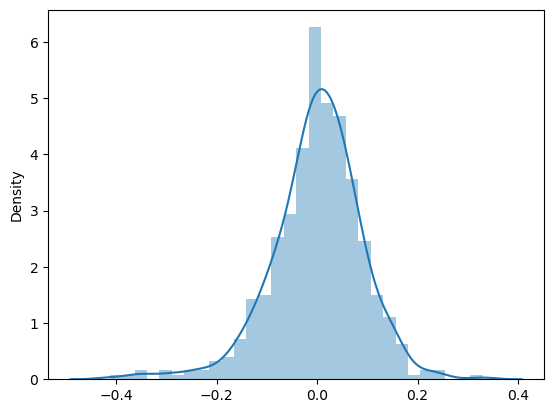

In [95]:
res = y_train-y_train_pred
sns.distplot(res)

## Prediction and evaluation on the test set
### Now that the model building is done, let’s go ahead and make inferences on the model.

In [108]:
# create a list of numeric variable
num_vars = ['temp','atemp','hum','windspeed','cnt']

#2. Fit on data
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

yr holiday  workingday      temp     atemp       hum  windspeed       cnt  \
184  0       1           0  0.831783  0.769660  0.657364   0.084219  0.692706   
535  1       0           1  0.901354  0.842587  0.610133   0.153728  0.712034   
299  0       0           1  0.511964  0.496145  0.837699   0.334206  0.303382   
221  0       0           1  0.881625  0.795343  0.437098   0.339570  0.547400   
152  0       0           1  0.817246  0.741471  0.314298   0.537414  0.569029   

     season_summer  season_fall  ...  mnth_Nov  mnth_Dec  weekday_Mon  \
184              0            1  ...         0         0            1   
535              1            0  ...         0         0            0   
299              0            0  ...         0         0            0   
221              0            1  ...         0         0            0   
152              1            0  ...         0         0            0   

     weekday_Tue  weekday_Wed  weekday_Thu  weekday_Fri  weekday_Sat  \
184            0            0            0            0            0   
535            0            1            0            0            0   
299            0            0            1            0            0   
221            0            1            0            0            0   
152            0            0            1            0            0   

     weathersit_Mist + Cloudy  weathersit_Light Snow/Rain  
184                         1                           0  
535                         0                           0  
299                         1                           0  
221                         0                           0  
152                         0                           0  

[5 rows x 30 columns]

In [109]:
df_test.describe()

workingday        temp       atemp         hum   windspeed         cnt  \
count  220.000000  220.000000  220.000000  220.000000  220.000000  220.000000   
mean     0.700000    0.558718    0.532847    0.638221    0.313293    0.522154   
std      0.459303    0.233187    0.217401    0.148694    0.159584    0.219163   
min      0.000000    0.046591    0.025950    0.261915   -0.042808    0.048205   
25%      0.000000    0.355429    0.344870    0.529197    0.198843    0.378595   
50%      1.000000    0.558172    0.544652    0.625590    0.300126    0.524678   
75%      1.000000    0.755981    0.713308    0.743798    0.402718    0.677750   
max      1.000000    0.984424    0.980934    1.002146    0.807474    0.963300   

       season_summer  season_fall  season_winter    mnth_Feb  ...    mnth_Nov  \
count     220.000000   220.000000     220.000000  220.000000  ...  220.000000   
mean        0.263636     0.245455       0.236364    0.100000  ...    0.072727   
std         0.441609     0.431338       0.425817    0.300684  ...    0.260281   
min         0.000000     0.000000       0.000000    0.000000  ...    0.000000   
25%         0.000000     0.000000       0.000000    0.000000  ...    0.000000   
50%         0.000000     0.000000       0.000000    0.000000  ...    0.000000   
75%         1.000000     0.000000       0.000000    0.000000  ...    0.000000   
max         1.000000     1.000000       1.000000    1.000000  ...    1.000000   

         mnth_Dec  weekday_Mon  weekday_Tue  weekday_Wed  weekday_Thu  \
count  220.000000   220.000000   220.000000   220.000000   220.000000   
mean     0.086364     0.127273     0.168182     0.100000     0.163636   
std      0.281541     0.334038     0.374881     0.300684     0.370789   
min      0.000000     0.000000     0.000000     0.000000     0.000000   
25%      0.000000     0.000000     0.000000     0.000000     0.000000   
50%      0.000000     0.000000     0.000000     0.000000     0.000000   
75%      0.000000     0.000000     0.000000     0.000000     0.000000   
max      1.000000     1.000000     1.000000     1.000000     1.000000   

       weekday_Fri  weekday_Sat  weathersit_Mist + Cloudy  \
count   220.000000   220.000000                220.000000   
mean      0.177273     0.118182                  0.318182   
std       0.382770     0.323559                  0.466833   
min       0.000000     0.000000                  0.000000   
25%       0.000000     0.000000                  0.000000   
50%       0.000000     0.000000                  0.000000   
75%       0.000000     0.000000                  1.000000   
max       1.000000     1.000000                  1.000000   

       weathersit_Light Snow/Rain  
count                  220.000000  
mean                     0.027273  
std                      0.163248  
min                      0.000000  
25%                      0.000000  
50%                      0.000000  
75%                      0.000000  
max                      1.000000  

[8 rows x 28 columns]

In [110]:
y_test = df_test.pop('cnt')
X_test = df_test

In [111]:
# add a constant
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

const yr holiday  workingday      temp     atemp       hum  windspeed  \
184    1.0  0       1           0  0.831783  0.769660  0.657364   0.084219   
535    1.0  1       0           1  0.901354  0.842587  0.610133   0.153728   
299    1.0  0       0           1  0.511964  0.496145  0.837699   0.334206   
221    1.0  0       0           1  0.881625  0.795343  0.437098   0.339570   
152    1.0  0       0           1  0.817246  0.741471  0.314298   0.537414   

     season_summer  season_fall  ...  mnth_Nov  mnth_Dec  weekday_Mon  \
184              0            1  ...         0         0            1   
535              1            0  ...         0         0            0   
299              0            0  ...         0         0            0   
221              0            1  ...         0         0            0   
152              1            0  ...         0         0            0   

     weekday_Tue  weekday_Wed  weekday_Thu  weekday_Fri  weekday_Sat  \
184            0            0            0            0            0   
535            0            1            0            0            0   
299            0            0            1            0            0   
221            0            1            0            0            0   
152            0            0            1            0            0   

     weathersit_Mist + Cloudy  weathersit_Light Snow/Rain  
184                         1                           0  
535                         0                           0  
299                         1                           0  
221                         0                           0  
152                         0                           0  

[5 rows x 30 columns]

In [100]:
#removing all the categories which have removed while doing OLR
X_test_sm = X_test_sm.drop(['weekday_Thu','atemp','weekday_Wed','weekday_Fri','mnth_Nov','mnth_Dec','mnth_Jul','weekday_Tue','weekday_Mon','mnth_Feb','mnth_Apr','mnth_Jun','mnth_May','season_fall','mnth_Mar','hum','mnth_Oct','holiday'], axis =1)

In [115]:
#predict
y_test_pred = lr_model.predict(X_test_sm)
y_test_pred

184    0.418804
535    0.915556
299    0.406834
221    0.594415
152    0.580668
         ...   
702    0.733754
127    0.475937
640    0.804180
72     0.277359
653    0.726246
Length: 220, dtype: float64

In [116]:
#evaluate
r2_score(y_true = y_test, y_pred=y_test_pred)

0.797331498623773

# Model Evaluation - Manual


In [117]:
#Train data result
print(lr_model.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     234.9
Date:                Mon, 15 Jan 2024   Prob (F-statistic):          4.31e-189
Time:                        14:39:15   Log-Likelihood:                 503.70
No. Observations:                 510   AIC:                            -983.4
Df Residuals:                     498   BIC:                            -932.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [118]:
#test data result
r2_score(y_true = y_test, y_pred=y_test_pred)

0.797331498623773

### R-squared score on the training data: 0.83

### R-squared score on the test data: 0.797

the model seems to perform well on both the training and test sets, indicating a good balance between fitting the training data and generalizing to new data

# RFE

In [120]:

df_train,df_test = train_test_split(bike, train_size=0.7,random_state=100)

print("Training set - X:",df_train.shape)
print("Training set - X:",df_test.shape)

Training set - X: (510, 31)
Training set - X: (220, 31)


In [121]:
df_train = df_train.drop(['dteday'],axis =1)
df_test = df_test.drop(['dteday'],axis =1)

In [123]:
# Create the regressor
lm = LinearRegression()
lm.fit(X_train, y_train)


# Create the RFE object and specify the number of features to select
rfe = RFE(lm, n_features_to_select=10)

# Fit the RFE to the data
rfe = rfe.fit(X_train, y_train)

In [124]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 11),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_summer', True, 1),
 ('season_fall', False, 6),
 ('season_winter', True, 1),
 ('mnth_Feb', False, 12),
 ('mnth_Mar', False, 7),
 ('mnth_Apr', False, 9),
 ('mnth_May', False, 8),
 ('mnth_Jun', False, 10),
 ('mnth_Jul', False, 13),
 ('mnth_Aug', True, 1),
 ('mnth_Sep', True, 1),
 ('mnth_Oct', False, 5),
 ('mnth_Nov', False, 14),
 ('mnth_Dec', False, 15),
 ('weekday_Mon', False, 16),
 ('weekday_Tue', False, 17),
 ('weekday_Wed', False, 19),
 ('weekday_Thu', False, 20),
 ('weekday_Fri', False, 18),
 ('weekday_Sat', False, 3),
 ('weathersit_Mist + Cloudy', False, 2),
 ('weathersit_Light Snow/Rain', True, 1)]

In [125]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_summer',
       'season_winter', 'mnth_Aug', 'mnth_Sep', 'weathersit_Light Snow/Rain'],
      dtype='object')

In [126]:
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'season_fall', 'mnth_Feb', 'mnth_Mar',
       'mnth_Apr', 'mnth_May', 'mnth_Jun', 'mnth_Jul', 'mnth_Oct', 'mnth_Nov',
       'mnth_Dec', 'weekday_Mon', 'weekday_Tue', 'weekday_Wed', 'weekday_Thu',
       'weekday_Fri', 'weekday_Sat', 'weathersit_Mist + Cloudy'],
      dtype='object')

## Building model using statsmodel, for the detailed statistics

In [128]:
#Creating X_test dataframes with RFE selected variables

X_train_rfe = X_train[col]
X_train_rfe

yr holiday      temp       hum  windspeed  season_summer  season_winter  \
576  1       0  0.815169  0.725633   0.264686              0              0   
426  1       0  0.442393  0.640189   0.255342              0              0   
728  1       0  0.245101  0.498067   0.663106              0              0   
482  1       0  0.395666  0.504508   0.188475              1              0   
111  0       0  0.345824  0.751824   0.380981              1              0   
..  ..     ...       ...       ...        ...            ...            ...   
578  1       0  0.863973  0.679690   0.187140              0              0   
53   0       0  0.202618  0.435939   0.111379              0              0   
350  0       0  0.248216  0.577930   0.431816              0              1   
79   0       0  0.462664  0.759870   0.529881              1              0   
520  1       0  0.600225  0.632030   0.359599              1              0   

     mnth_Aug  mnth_Sep  weathersit_Light Snow/Rain  
576         0         0                           0  
426         0         0                           0  
728         0         0                           0  
482         0         0                           0  
111         0         0                           0  
..        ...       ...                         ...  
578         1         0                           0  
53          0         0                           0  
350         0         0                           0  
79          0         0                           0  
520         0         0                           0  

[510 rows x 10 columns]

In [129]:
#add constant
X_train_rfe = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     248.8
Date:                Mon, 15 Jan 2024   Prob (F-statistic):          1.02e-186
Time:                        14:49:42   Log-Likelihood:                 495.21
No. Observations:                 510   AIC:                            -968.4
Df Residuals:                     499   BIC:                            -921.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [130]:
X_train_new = X_train_rfe.drop(['const'],axis =1)

In [131]:
#calculate the vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X= X_train_new

vif['Feauture'] = X.columns
vif['VIF']= [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF']= round(vif['VIF'],2)

vif = vif.sort_values(by = "VIF", ascending=False)
vif

Feauture    VIF
3                         hum  10.02
2                        temp   8.52
4                   windspeed   3.57
0                          yr   2.01
5               season_summer   1.82
6               season_winter   1.73
7                    mnth_Aug   1.57
8                    mnth_Sep   1.30
9  weathersit_Light Snow/Rain   1.09
1                     holiday   1.04

In [132]:
X_train_new = X_train_rfe.drop(['hum'],axis =1)

In [133]:
#add constant
X_train_rfe = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_new).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     230.3
Date:                Mon, 15 Jan 2024   Prob (F-statistic):          1.39e-171
Time:                        14:59:29   Log-Likelihood:                 456.65
No. Observations:                 510   AIC:                            -893.3
Df Residuals:                     500   BIC:                            -851.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [135]:
X_train_new = X_train_rfe.drop(['const'],axis =1)

In [136]:
vif = pd.DataFrame()
X= X_train_new

vif['Feauture'] = X.columns
vif['VIF']= [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF']= round(vif['VIF'],2)

vif = vif.sort_values(by = "VIF", ascending=False)
vif

Feauture   VIF
2                        temp  4.99
3                   windspeed  3.01
0                          yr  2.00
4               season_summer  1.79
6                    mnth_Aug  1.57
5               season_winter  1.44
7                    mnth_Sep  1.29
8  weathersit_Light Snow/Rain  1.06
1                     holiday  1.04

## Residual analysis of the training data

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [138]:
X_train_lm = sm.add_constant(X_train_new)
y_train_price = lm.predict(X_train_lm)

Text(0.5, 9.444444444444438, 'Error')

<Figure size 640x480 with 0 Axes>

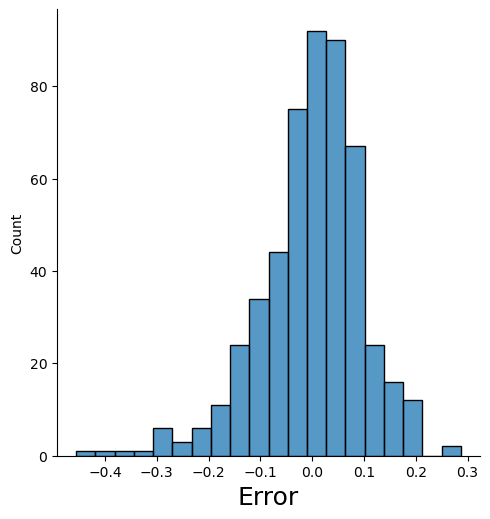

In [139]:
#plot the histogram of the error terms
fig = plt.figure()
sns.displot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Error', fontsize = 18)


## Market Predictions

In [140]:
#Applying the scaling on the test sets

num_vars =  ['temp','atemp','hum','windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [141]:
#Dividing into X_test and y_test

y_train = df_train.pop('cnt')
X_train = df_train

In [142]:
#Now let's use our model to make pred

#creating X_test _new dataframe by dropping var from X_test
X_test_new = X_test[X_train_new.columns]

#adding a constant variable

X_test_new = sm.add_constant(X_test_new)

In [143]:
y_pred = lm.predict(X_test_new)

## Model evaluation


Text(0, 0.5, 'y_pred')

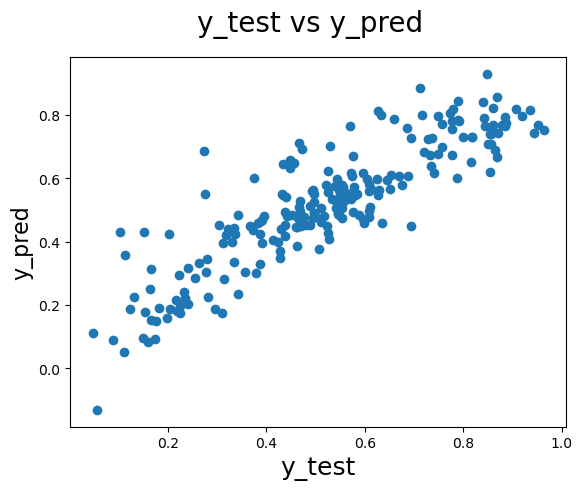

In [144]:
# plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16)

Here we have done both manual and automatic. the result what we got almost same in both the case we got R2 between 80 t0 85% in both cases.

Output of the these feauture selection is almost similar to the manual